In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob 

In [6]:
#Reading all the files 
with open(r"C:\Users\Hp\Downloads\Pandas\sales_data\Sales_April_2019.csv") as f:
    data=f.read()
    
    


In [7]:
#displaying the list of files in the dataset
content=os.listdir(r'C:\Users\Hp\Downloads\Pandas\sales_data')
for content in content:
    print(content)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [8]:
#finding all csv files in the directory and storing in all_files
all_files = glob.glob(os.path.join(r'C:\Users\Hp\Downloads\Pandas\sales_data', "*.csv"))

#Concatenating all csv files into one file named all_data
all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
all_data = pd.concat(all_df, ignore_index=True, sort=True)

In [9]:
all_data.shape

(186850, 7)

In [10]:
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
1,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
3,04/12/19 14:38,176560,600,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...


In [11]:
all_data.describe()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file
count,186305,186305,186305,186305,186305,186305,186850
unique,142396,178438,24,20,140788,10,12
top,Order Date,Order ID,11.95,USB-C Charging Cable,Purchase Address,1,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
freq,355,355,21903,21903,355,168552,25117


### Clean up the data!



In [12]:
# To check for null values

all_data.isnull().any()

Order Date           True
Order ID             True
Price Each           True
Product              True
Purchase Address     True
Quantity Ordered     True
file                False
dtype: bool

In [13]:
# To drop all rows with null values

all_data.dropna(inplace=True)
all_data.isnull().any()
all_data.shape


(186305, 7)

In [17]:
# converting 'qty ordered and price' into int 

all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype('float')
all_data['Price Each']=all_data['Price Each'].astype('float')

In [18]:
# finding 'or' in data and removing it 
all_data=all_data[all_data['Order Date'].str[0:2] !='Or']
all_data.head(5)

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
3,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...
5,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...


In [19]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file,Month
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4
3,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4
5,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4


### Augmenting columns

In [20]:
# add a sales column 

all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']
all_data['Sales']
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file,Month,Sales
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,23.90
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,99.99
3,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,600.00
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99
5,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99


## What was the month for the best sales and what amount was earned?

In [21]:
results=all_data.groupby('Month').sum()
results

,Price Each,Quantity Ordered,Sales
Month,,,
1,1.811768e+06,10903.0,1.822257e+06
2,2.188885e+06,13449.0,2.202022e+06
3,2.791208e+06,17005.0,2.807100e+06
4,3.367671e+06,20558.0,3.390670e+06
5,3.135125e+06,18667.0,3.152607e+06
6,2.562026e+06,15253.0,2.577802e+06
7,2.632540e+06,16072.0,2.647776e+06
8,2.230345e+06,13448.0,2.244468e+06
9,2.084992e+06,13109.0,2.097560e+06


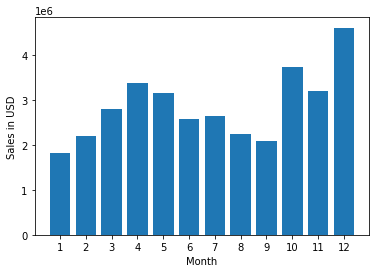

In [22]:
months=range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

## What city has the highest no. of Sales?

In [23]:
# Extracting city and state from purchase address
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City']=all_data['Purchase Address'].apply(lambda x: get_city(x)+''+get_state(x))
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file,Month,Sales,City
0,04/19/19 08:46,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,23.90,DallasTX
2,04/07/19 22:30,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,99.99,BostonMA
3,04/12/19 14:38,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,600.00,Los AngelesCA
4,04/12/19 14:38,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99,Los AngelesCA
5,04/30/19 09:27,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99,Los AngelesCA


In [24]:
results=all_data.groupby('City').sum()
results

,Price Each,Quantity Ordered,Month,Sales
City,,,,
AtlantaGA,2.779908e+06,16602.0,104794,2.795499e+06
AustinTX,1.809874e+06,11153.0,69829,1.819582e+06
BostonMA,3.637410e+06,22528.0,141112,3.661642e+06
DallasTX,2.752628e+06,16730.0,104620,2.767975e+06
Los AngelesCA,5.421435e+06,33289.0,208325,5.452571e+06
New York CityNY,4.635371e+06,27932.0,175741,4.664317e+06
PortlandME,4.471893e+05,2750.0,17144,4.497583e+05
PortlandOR,1.860558e+06,11303.0,70621,1.870732e+06
San FranciscoCA,8.211462e+06,50239.0,315520,8.262204e+06


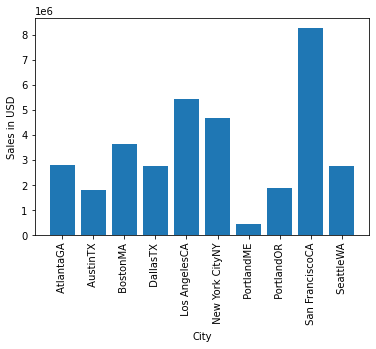

In [25]:
#to keep cities in same order as sales 
cities= [city for city , df in all_data.groupby('City')]

#plot city vs sales graph

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation='vertical',size=10)
plt.xlabel('City')
plt.ylabel('Sales in USD')
plt.show()

## What time we should display advertisements to increase buying probability?

In [26]:
# To display the order date in proper datetime format

all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [27]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file,Month,Sales,City,Hour,Minute
0,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,23.90,DallasTX,8,46
2,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,99.99,BostonMA,22,30
3,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,600.00,Los AngelesCA,14,38
4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99,Los AngelesCA,14,38
5,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99,Los AngelesCA,9,27


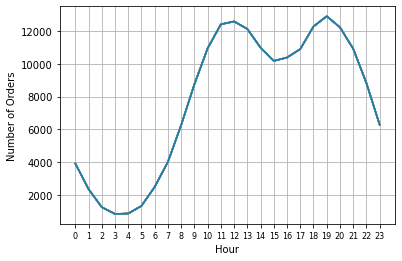

In [28]:
# Representing hour vs no. of orders as a linear plot

hours= [hour for hour , df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby('Hour').count())
plt.xticks(hours,size=8)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()


## What products are more often sold together?

In [29]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

# To group products that were brought together
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# to remove the duplicates of same order
df=df[['Order ID','Grouped']].drop_duplicates()
df.head()


<ipython-input-29-b63d0616bcc1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
# Reference https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

# To visualize the products as a list
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
# To display in a good manner
for key,value in count.most_common(20):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
('Lightning Charging Cable', 'Apple Airpods Headphones') 81
('Vareebadd Phone', 'Bose SoundSport Headphones') 80
('USB-C Charging Cable', 'Bose SoundSport Headphones') 77
('Apple Airpods Headphones', 'Wired Headphones') 69
('Lightning Charging Cable', 'USB-C Charging Cable') 58
('Lightning Charging Cable', 'AA Batteries (4-pack)') 55
('Lightning Charging Cable', 'Lightning Charging Cable') 54
('Bose SoundSport Headphones', 'Wired Headphones') 53
('AA Batteries (4-pack)', 'Lightning Charging Cable') 51
('AAA Batteries (4-pack)', 'USB-C Chargin

## What product was sold the most and why?


In [33]:
all_data.head()

,Order Date,Order ID,Price Each,Product,Purchase Address,Quantity Ordered,file,Month,Sales,City,Hour,Minute
0,2019-04-19 08:46:00,176558,11.95,USB-C Charging Cable,"917 1st St, Dallas, TX 75001",2.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,23.90,DallasTX,8,46
2,2019-04-07 22:30:00,176559,99.99,Bose SoundSport Headphones,"682 Chestnut St, Boston, MA 02215",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,99.99,BostonMA,22,30
3,2019-04-12 14:38:00,176560,600.00,Google Phone,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,600.00,Los AngelesCA,14,38
4,2019-04-12 14:38:00,176560,11.99,Wired Headphones,"669 Spruce St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99,Los AngelesCA,14,38
5,2019-04-30 09:27:00,176561,11.99,Wired Headphones,"333 8th St, Los Angeles, CA 90001",1.0,C:\Users\Hp\Downloads\Pandas\sales_data\Sales_...,4,11.99,Los AngelesCA,9,27


In [35]:
#Grouping by product to get the prices and quantity ordered of each item 

product_grp=all_data.groupby('Product')
product_grp.sum()

,Price Each,Quantity Ordered,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,451068.99,4129.0,29336,454148.71,58764,122252
27in 4K Gaming Monitor,2429637.70,6244.0,44440,2435097.56,90916,184331
27in FHD Monitor,1125974.93,7550.0,52558,1132424.50,107540,219948
34in Ultrawide Monitor,2348718.19,6199.0,43304,2355558.01,89076,183480
AA Batteries (4-pack),79015.68,27635.0,145558,106118.40,298342,609039
AAA Batteries (4-pack),61716.59,31017.0,146370,92740.83,297332,612113
Apple Airpods Headphones,2332350.00,15661.0,109477,2349150.00,223304,455570
Bose SoundSport Headphones,1332366.75,13457.0,94113,1345565.43,192445,392603
Flatscreen TV,1440000.00,4819.0,34224,1445700.00,68815,142789


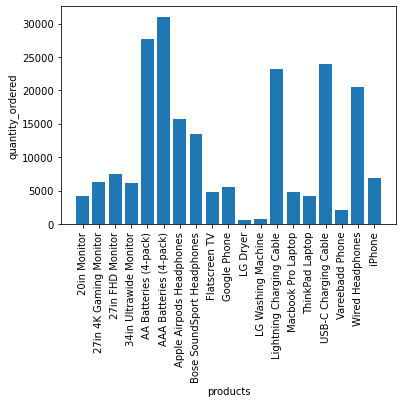

In [42]:
# Plotting as a bar graph

quantity_ordered=product_grp.sum()['Quantity Ordered']
products=[product for product, df in product_grp]

plt.bar(products,quantity_ordered)
plt.xlabel('products')
plt.ylabel('quantity_ordered')
plt.xticks(products,rotation='vertical',size=10)
plt.show()

In [51]:
prices=all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


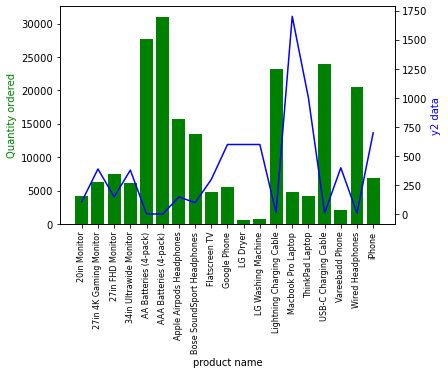

In [55]:
#add a second y axis to matplotlib chart--googled
prices=all_data.groupby('Product').mean()['Price Each']

fig,ax1=plt.subplots()

ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xlabel('product name')
ax1.set_ylabel('Quantity ordered',color='g')
ax2.set_ylabel('y2 data',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()